In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS

In [ ]:
record=[]
hand=open('loseit.txt')
for lose in hand:
  lose=lose.rstrip()
  words=lose.split(',')
  record.append(words)

print(record[0])

['False', 'ekinho', '1424007520', '', 'noflair', '[]', '', 'New', 'dark', 'text', 't2_ldbry', 'False', 'Dont be afraid of becoming fat again remember that you can do exactly what you did  to get where you are now. Again. All you need is willpower.', 'True', 'False', 'False', 'None', '0', '1538352007', 'None', 'False', '0', "{'gid_1': 0 'gid_2': 0 'gid_3': 0}", 'e6xucm5', 'False', 't3_9k5icl', 'True', 't3_9k5icl', '/r/loseit/comments/9k5icl/its_still_so_surreal_being_skinny_i_sometimes/e6xucm5/', 'None', '1539714095', '2', 'True', 'False', 'loseit', 't5_2rz8w', 'r/loseit', 'public']


In [ ]:
lst=[]
for j in range(len(record)):
  if len(record[j])==38:
    lst.append(record[j])

lst=pd.DataFrame(lst)

In [ ]:
lst.columns=['archived','author','author_created_utc',
                     'author_flair_background_color',
                     'author_flair_css_class',
                     'author_flair_richtext',
                     'author_flair_template_id',
                     'author_flair_text',
                     'author_flair_text_color',
                     'author_flair_type',
                     'author_fullname',
                     'author_patreon_flair',
                     'body',
                     'can_gild',
                     'can_mod_post',
                     'collapsed',
                     'collapsed_reason',
                     'controversiality',
                     'created_utc',
                     'distinguished',
                     'edited',
                     'gilded',
                     'gildings',
                     'id',
                     'is_submitter',
                     'link_id',
                     'no_follow',
                     'parent_id',
                     'permalink',
                     'removal_reason',
                     'retrieved_on',
                     'score',
                     'send_replies',
                     'stickied',
                     'subreddit',
                     'subreddit_id',
                     'subreddit_name_prefixed',
                     'subreddit_type']

In [ ]:
### check each important columns: post 'body','score','created_utc' and 'author'
### by checking the value appear the most in each of these four columns, I found some malpositioned rows and an auhthor called 'automoderator'
### who just post subreddit rules or ads, so all these rows are removed

In [ ]:
lst_clean=lst.dropna()
lst_clean=lst_clean[(lst_clean['author']!='None') & (lst_clean['author']!='[deleted]')]

In [ ]:
lst_clean2=lst_clean[lst_clean['author']!='AutoModerator']

In [ ]:
lst_clean3=lst_clean2[lst_clean2['author']!='1325741068']

In [ ]:
lst_clean4=lst_clean3[(lst_clean3['body']!='True') & (lst_clean3['body']!='False')]

In [ ]:
### find out post 'score' outlier. The top 1 & 2 scores (11189 & 6718) are far more higher than the top 3 (2299) score
### Considering there are more than 130k records in total, removing these two records will not impact the information I can get from the data
### and the distribution of 'score' will be more reasonable.

In [ ]:
lst_score_ct=lst_clean4.groupby('score')['score'].count().to_frame()

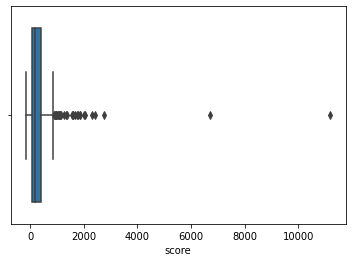

In [ ]:
sb.boxplot(lst_score_ct['score'].astype(int))

In [ ]:
list(lst_clean4[lst_clean4['score']=='11189']['body'])

['Hey guys. At someone’s suggestion I’m signing off reddit. Gonna delete the app from my phone &amp; logout on my desktop.   I won’t be back until June 15th 2019 when I’ll post a progress pic on r/loseit  .  Thank you for your kind words gentle roasts &amp; accusations of paedophilia.   Can someone do one of those remind me bot things on this comment? Thanks &amp; I love you. I won’t let you down.   !remind me 6 months !remindme 6 months']

In [ ]:
list(lst_clean4[lst_clean4['score']=='6718']['body'])

['Being fat &amp; people telling you to ‘love yourself for who you are’ that kind of stuff. I’m obese &amp; it fucking sucks. There’s nothing good about it. It’s the main reason for so many of my insecurities. I’m trying to finally get in shape now &amp; I want nothing more than to reach my goal.   Thank you everyone for all the kind words of encouragement I’m not gonna stop. Having communities like r/loseit helps so much. I won’t disappoint!']

In [ ]:
lst_clean5=lst_clean4[lst_clean4['score']!='11189']
lst_clean5=lst_clean5[lst_clean5['score']!='6718']

In [ ]:
len(lst_clean5)

137632

In [ ]:
lst_score_ct2=lst_clean5.groupby('score')['score'].count().to_frame()
lst_score_ct2.columns=['cnt']
lst_score_ct2.reset_index(inplace=True)

count     478.000000
mean      301.366109
std       381.654115
min      -158.000000
25%        69.250000
50%       193.500000
75%       392.500000
max      2761.000000
Name: score, dtype: float64


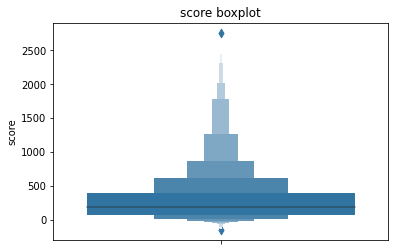

In [ ]:
print(lst_score_ct2['score'].astype(int).describe())
sb.boxenplot(y=lst_score_ct2['score'].astype(int))
plt.title('score boxplot')
plt.show()

count     478.000000
mean      301.366109
std       381.654115
min      -158.000000
25%        69.250000
50%       193.500000
75%       392.500000
max      2761.000000
Name: score, dtype: float64


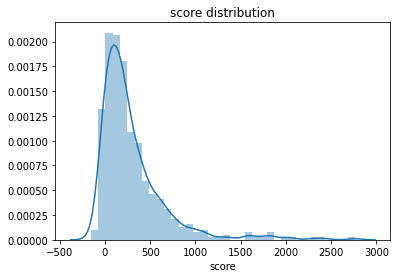

In [ ]:
print(lst_score_ct2['score'].astype(int).describe())
sb.distplot(lst_score_ct2['score'].astype(int))
plt.title('score distribution')
plt.show()

In [ ]:
### check the relation between 'created time' and 'score'
### the correlation coefficient is very low, indicating there is no direct connection

In [ ]:
created_time=lst_clean5['created_utc'].astype(int).to_list()

In [ ]:
created_time2=[]
for i in created_time:
  t=pd.to_datetime(i,unit='s')
  created_time2.append(t)

In [ ]:
max(created_time2)

Timestamp('2019-01-31 08:35:48')

In [ ]:
min(created_time2)

Timestamp('2018-10-01 00:00:07')

In [ ]:
lst_clean5['score'].astype(int).corr(lst_clean5['created_utc'].astype(int))

0.008637950175856047